## Entropy of word order distributions

We are going to use Pandas to manipulate the data:

In [216]:
import pandas as pd
import numpy as np

In [217]:
#Read the data
wordorder=pd.read_csv('/content/acl2015-wordorder-tokens-81A.tsv', sep='\t', index_col=0)
entropies50k=pd.read_csv('/content/BlockH_EPC_PBC_UDHR_50K.csv', index_col=0)

In [218]:
wordorder

,SOV,SVO,OSV,OVS,VSO,VOS,MAX,WALS
ISO,,,,,,,,
aai,64,8,12,6,1,2,SOV,_
aak,81,17,20,33,5,9,SOV,_
aau,37,1,7,0,1,0,SOV,SOV
abt,29,7,5,8,1,1,SOV,SOV
aby,53,11,10,11,6,5,SOV,_
...,...,...,...,...,...,...,...,...
zpz,1,15,4,5,12,4,SVO,_
zsr,2,12,0,2,5,20,VOS,_
ztq,4,46,5,9,20,7,SVO,_


We will add three new columns:

*   "OS" (number of sentences with OS order)
*   "SO" (number of sentences with SO order)
*   No_Sentences (total number of sentences per language)

In [219]:
SO = wordorder["SOV"] + wordorder["SVO"]+ wordorder["VSO"]
OS = wordorder["OSV"] + wordorder["OVS"]+ wordorder["VOS"]
wordorder["SO"] = SO
wordorder["OS"] = OS
TOTAL= wordorder["SO"]+wordorder["OS"]
wordorder["Num_Sentences"] = TOTAL
wordorder

,SOV,SVO,OSV,OVS,VSO,VOS,MAX,WALS,SO,OS,Num_Sentences
ISO,,,,,,,,,,,
aai,64,8,12,6,1,2,SOV,_,73,20,93
aak,81,17,20,33,5,9,SOV,_,103,62,165
aau,37,1,7,0,1,0,SOV,SOV,39,7,46
abt,29,7,5,8,1,1,SOV,SOV,37,14,51
aby,53,11,10,11,6,5,SOV,_,70,26,96
...,...,...,...,...,...,...,...,...,...,...,...
zpz,1,15,4,5,12,4,SVO,_,28,13,41
zsr,2,12,0,2,5,20,VOS,_,19,22,41
ztq,4,46,5,9,20,7,SVO,_,70,21,91


**ENTROPY CALCULATION**
 
*   Entropy over the word order distributions: SOV 	SVO 	OSV 	OVS 	VSO 	VOS 	

In [220]:
features=wordorder.drop(["MAX","WALS", "SO", "OS", "Num_Sentences"],axis=1) #We drop the columns that we are not going to use
iso=features.index.tolist() #List of ISOcodes
entropies=[]
for index in range(len(iso)): #We are processing row by row
  freqs=features.iloc[index].to_numpy() #We convert the row to a Numpy array
  freqs=freqs[freqs != 0]  #We extract only the values not equal to zero.
  p = freqs/freqs.sum()    #Probability (relative frequency)
  H=-(p*np.log2(p)).sum()  #Entropy calculation
  entropies.append(H)      #We store the entropy of each row in an array
wordorder['H'] = entropies   #We add the array as a new column to the DataFrame
wordorder

,SOV,SVO,OSV,OVS,VSO,VOS,MAX,WALS,SO,OS,Num_Sentences,H
ISO,,,,,,,,,,,,
aai,64,8,12,6,1,2,SOV,_,73,20,93,1.501209
aak,81,17,20,33,5,9,SOV,_,103,62,165,2.056884
aau,37,1,7,0,1,0,SOV,SOV,39,7,46,0.906143
abt,29,7,5,8,1,1,SOV,SOV,37,14,51,1.826493
aby,53,11,10,11,6,5,SOV,_,70,26,96,2.001359
...,...,...,...,...,...,...,...,...,...,...,...,...
zpz,1,15,4,5,12,4,SVO,_,28,13,41,2.205539
zsr,2,12,0,2,5,20,VOS,_,19,22,41,1.819314
ztq,4,46,5,9,20,7,SVO,_,70,21,91,2.020840


*   Entropy over the word order distributions: SO 	OS

In [221]:
features=wordorder[["SO", "OS"]] #We take only the columns that we are going to use
iso=features.index.tolist() #List of ISOcodes
entropies=[]
for index in range(len(iso)): #We are processing row by row
  freqs=features.iloc[index].to_numpy() #We convert the row to a Numpy array
  freqs=freqs[freqs != 0]  #We extract only the values not equal to zero.
  p = freqs/freqs.sum()    #Probability (relative frequency)
  H=-(p*np.log2(p)).sum()  #Entropy calculation
  entropies.append(H)      #We store the entropy of each row in an array
wordorder['H_SO'] = entropies #We add the array as a new column to the DataFrame
wordorder

,SOV,SVO,OSV,OVS,VSO,VOS,MAX,WALS,SO,OS,Num_Sentences,H,H_SO
ISO,,,,,,,,,,,,,
aai,64,8,12,6,1,2,SOV,_,73,20,93,1.501209,0.751032
aak,81,17,20,33,5,9,SOV,_,103,62,165,2.056884,0.954991
aau,37,1,7,0,1,0,SOV,SOV,39,7,46,0.906143,0.615254
abt,29,7,5,8,1,1,SOV,SOV,37,14,51,1.826493,0.847862
aby,53,11,10,11,6,5,SOV,_,70,26,96,2.001359,0.842658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zpz,1,15,4,5,12,4,SVO,_,28,13,41,2.205539,0.901170
zsr,2,12,0,2,5,20,VOS,_,19,22,41,1.819314,0.996134
ztq,4,46,5,9,20,7,SVO,_,70,21,91,2.020840,0.779350


Plotting the histograms of entropy values:

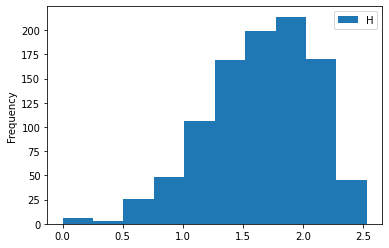

In [222]:
wordorder[['H']].plot.hist()

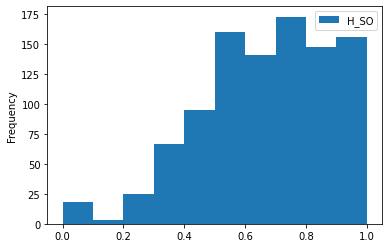

In [223]:
wordorder[['H_SO']].plot.hist()




---


Joining our results with the word entropy values *(BlockH_EPC_PBC_UDHR_50K)*

In [224]:
entropies50k

,iso,num_tokens,H_ML,H_MM,H_Jeff,H_Lap,H_SG,H_minmax,H_CS,H_NSB,H_shrink,corpus
file,,,,,,,,,,,,
bg_tokenized_1mio,bul,50000,9.781680,9.892508,10.115657,10.388494,9.781777,9.803204,10.057565,9.944499,9.790227,EPC
cs_tokenized_1mio,ces,50000,10.938515,11.081024,11.258764,11.507686,10.938589,10.955007,11.185492,11.066693,10.958576,EPC
da_tokenized_1mio,dan,50000,9.456836,9.550741,9.757233,10.008348,9.456938,9.479399,9.694587,9.606737,9.469545,EPC
nl_tokenized_1mio,nld,50000,9.084549,9.164936,9.357162,9.589850,9.084655,9.108197,9.299038,9.223514,9.092268,EPC
en_tokenized_1mio,eng,50000,9.006550,9.073534,9.229996,9.424297,9.006653,9.029571,9.176861,9.118318,9.014738,EPC
...,...,...,...,...,...,...,...,...,...,...,...,...
hbo-x-bible-westminster.csv,hbo,50000,12.127343,12.344959,12.472281,12.714850,12.127398,12.139638,12.403218,12.221889,12.172960,PBC
esk-x-bible.csv,esk,50000,12.517256,12.809647,12.939824,13.215269,12.517309,12.528965,12.926138,13.546939,12.550563,PBC
ike-x-bible.csv,ike,50000,12.949484,13.261972,13.320453,13.555010,12.949528,12.959268,13.309612,13.798097,13.004339,PBC


In [225]:
#Dropping repeated languages, we only keep one (the last one)
#Renaming the iso column and making it index, so we can join the dataframes:
entropies50k_uniq=entropies50k.drop_duplicates(subset=['iso'], keep='last').rename(columns={"iso": "ISO"})  
entropies50k_uniq=entropies50k_uniq.set_index('ISO')
all=wordorder.join(entropies50k_uniq)   #Everything in a dataframe
all.to_csv("wordorder_tokens.csv")  #We save it as a csv (change it to your desired directory)
all

,SOV,SVO,OSV,OVS,VSO,VOS,MAX,WALS,SO,OS,Num_Sentences,H,H_SO,num_tokens,H_ML,H_MM,H_Jeff,H_Lap,H_SG,H_minmax,H_CS,H_NSB,H_shrink,corpus
ISO,,,,,,,,,,,,,,,,,,,,,,,,
aai,64,8,12,6,1,2,SOV,_,73,20,93,1.501209,0.751032,50000.0,9.266413,9.340870,9.509520,9.717858,9.266515,9.289126,9.459969,9.387608,9.281023,PBC
aak,81,17,20,33,5,9,SOV,_,103,62,165,2.056884,0.954991,50000.0,9.990882,10.096905,10.296472,10.546508,9.990974,10.011448,10.238376,10.135637,10.009545,PBC
aau,37,1,7,0,1,0,SOV,SOV,39,7,46,0.906143,0.615254,50000.0,8.367715,8.401892,8.488817,8.599049,8.367822,8.391528,8.453970,8.428913,8.382537,PBC
abt,29,7,5,8,1,1,SOV,SOV,37,14,51,1.826493,0.847862,50000.0,8.791031,8.837010,8.944625,9.081959,8.791134,8.813720,8.905811,8.866830,8.804910,PBC
aby,53,11,10,11,6,5,SOV,_,70,26,96,2.001359,0.842658,50000.0,9.144974,9.208915,9.353171,9.534314,9.145076,9.167435,9.305875,9.247740,9.157066,PBC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zpz,1,15,4,5,12,4,SVO,_,28,13,41,2.205539,0.901170,50000.0,7.704079,7.732038,7.812578,7.912899,7.704196,7.729929,7.779313,7.760959,7.710547,PBC
zsr,2,12,0,2,5,20,VOS,_,19,22,41,1.819314,0.996134,50000.0,9.087218,9.154043,9.310758,9.504619,9.087322,9.110335,9.262937,9.199465,9.102091,PBC
ztq,4,46,5,9,20,7,SVO,_,70,21,91,2.020840,0.779350,50000.0,8.160262,8.205505,8.332580,8.487694,8.160378,8.186045,8.291272,8.250977,8.166681,PBC
